In [83]:
# imports
import requests
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import gmaps

# api keys
from config import wkey, epakey, censuskey, epaemail
# from config import gkey

# access maps
# gmaps.configure(api_key=gkey)

In [ ]:
# Abby's section starts here

In [86]:
# PurpleAir API

purple_air_df = pd.DataFrame()
purple_air_df['Index'] = [x for x in range(10000)]
purple_air_df = purple_air_df.set_index('Index')
purple_air_df['PLat'] = ""
purple_air_df['PLng'] = ""
purple_air_df['PLocation'] = ""
purple_air_df['PPM2_5'] = ""
purple_air_df['PTemp'] = ""
purple_air_df['PHumd'] = ""
purple_air_df['PPressure'] = ""
purple_air_df['PDataDate'] = ""
purple_air_df['PStats'] = ""

base_url = "https://www.purpleair.com/json"
response = requests.get(base_url).json()

for index, row in purple_air_df.iterrows():
    
    try:
        purple_air_df.loc[index, 'PLat'] = response['results'][index]['Lat']
        purple_air_df.loc[index, 'PLng'] = response['results'][index]['Lon']
        purple_air_df.loc[index, 'PLocation'] = response['results'][index]['DEVICE_LOCATIONTYPE']
        purple_air_df.loc[index, 'PPM2_5'] = response['results'][index]['PM2_5Value']
        purple_air_df.loc[index, 'PTemp'] = response['results'][index]['temp_f']
        purple_air_df.loc[index, 'PHumd'] = response['results'][index]['humidity']
        purple_air_df.loc[index, 'PPressure'] = response['results'][index]['pressure']
        purple_air_df.loc[index, 'PDataDate'] = response['results'][index]['LastSeen']
        purple_air_df.loc[index, 'PStats'] = response['results'][index]['Stats']
#         could also pull time since last seen and only grab values from the last hour
    except:
        pass

purple_air_df = purple_air_df.dropna()
purple_air_df

,PLat,PLng,PLocation,PPM2_5,PTemp,PHumd,PPressure,PDataDate,PStats
Index,,,,,,,,,
0,37.2756,-121.964,outside,3.19,64,49,1019.03,1580268624,"{""v"":3.19,""v1"":2.78,""v2"":3.34,""v3"":2.9,""v4"":2...."
1,37.2756,-121.964,,,,,,,
2,30.0538,-95.4946,outside,2.74,58,63,1010.35,1580268726,"{""v"":2.74,""v1"":4.01,""v2"":7.02,""v3"":9.26,""v4"":1..."
3,30.0538,-95.4946,,,,,,,
4,37.7224,-122.439,outside,3.04,57,52,993.73,1580268704,"{""v"":3.04,""v1"":4.29,""v2"":5.62,""v3"":5.28,""v4"":4..."
...,...,...,...,...,...,...,...,...,...
9995,40.5741,-74.4718,,,,,,,
9996,35.1345,-120.616,outside,2.8,65,50,1021.71,1580268640,"{""v"":2.8,""v1"":2.65,""v2"":2.63,""v3"":3.01,""v4"":3...."
9997,35.1345,-120.616,,,,,,,


In [112]:
mask = (purple_air_df['PDataDate'] != '') & (purple_air_df['PLocation']=='outside')
purple_air_df = purple_air_df.loc[mask,:]
purple_air_df = purple_air_df.astype({'PTemp':'int32'
                                      ,'PPM2_5':'double'
                                      ,'PHumd':'int'
                                      ,'PPressure':'double'
                                      ,'PDataDate':'int64'})
purple_air_df.dtypes

PLat          object
PLng          object
PLocation     object
PPM2_5       float64
PTemp          int32
PHumd          int64
PPressure    float64
PDataDate      int64
PStats        object
dtype: object

In [7]:
response

{'mapVersion': '0.4',
 'baseVersion': '7',
 'mapVersionString': '',
 'results': [{'ID': 14633,
   'Label': ' Hazelwood canary ',
   'DEVICE_LOCATIONTYPE': 'outside',
   'THINGSPEAK_PRIMARY_ID': '559921',
   'THINGSPEAK_PRIMARY_ID_READ_KEY': 'CU4BQZZ38WO5UJ4C',
   'THINGSPEAK_SECONDARY_ID': '559922',
   'THINGSPEAK_SECONDARY_ID_READ_KEY': 'D0YNZ1LM59LL49VQ',
   'Lat': 37.275561,
   'Lon': -121.964134,
   'PM2_5Value': '2.21',
   'LastSeen': 1580231904,
   'Type': 'PMS5003+PMS5003+BME280',
   'Hidden': 'false',
   'isOwner': 0,
   'humidity': '51',
   'temp_f': '63',
   'pressure': '1022.21',
   'AGE': 0,
   'Stats': '{"v":2.21,"v1":2.19,"v2":1.95,"v3":1.84,"v4":2.49,"v5":4.83,"v6":6.0,"pm":2.21,"lastModified":1580231904685,"timeSinceModified":120010}'},
  {'ID': 14634,
   'ParentID': 14633,
   'Label': ' Hazelwood canary  B',
   'THINGSPEAK_PRIMARY_ID': '559923',
   'THINGSPEAK_PRIMARY_ID_READ_KEY': 'DULWDNCI9M6PCIPC',
   'THINGSPEAK_SECONDARY_ID': '559924',
   'THINGSPEAK_SECONDARY_ID_

In [113]:
purple_air_df = purple_air_df.loc[purple_air_df['PLocation']=='outside']

mask_us = (purple_air_df['PLat'] > 19.50) & (purple_air_df['PLat'] < 64.85) & (purple_air_df['PLng'] > -161.76) & (purple_air_df['PLng'] < -68.01)
US_purple_air_df = purple_air_df.loc[mask_us,:]

mask_mn = (purple_air_df['PLat'] > 43.57) & (purple_air_df['PLat'] < 49.38) & (purple_air_df['PLng'] > -97.20) & (purple_air_df['PLng'] < -89.57)
MN_purple_air_df = purple_air_df.loc[mask_mn,:]

MN_purple_air_df

,PLat,PLng,PLocation,PPM2_5,PTemp,PHumd,PPressure,PDataDate,PStats
Index,,,,,,,,,
246,44.9453,-93.2732,outside,25.95,28,56,991.54,1580268741,"{""v"":25.95,""v1"":22.66,""v2"":21.45,""v3"":20.19,""v..."
406,45.0005,-89.5995,outside,0.95,35,47,970.28,1580268627,"{""v"":0.95,""v1"":0.64,""v2"":0.61,""v3"":0.65,""v4"":0..."
958,44.9678,-93.66,outside,24.33,30,46,986.38,1580268731,"{""v"":24.33,""v1"":23.71,""v2"":20.99,""v3"":18.37,""v..."
1710,45.138,-93.26,outside,4.85,31,46,990.88,1580268737,"{""v"":4.85,""v1"":5.35,""v2"":5.3,""v3"":5.13,""v4"":4...."
2124,45.0595,-93.2941,outside,8.53,28,53,992.11,1580268677,"{""v"":8.53,""v1"":7.98,""v2"":7.72,""v3"":7.83,""v4"":8..."
3278,44.9273,-91.382,outside,5.79,22,61,990.15,1580268659,"{""v"":5.79,""v1"":6.5,""v2"":6.53,""v3"":6.37,""v4"":6...."
3644,46.8111,-92.0597,outside,2.79,31,61,998.19,1580268651,"{""v"":2.79,""v1"":3.71,""v2"":3.26,""v3"":2.75,""v4"":1..."
4188,46.8075,-92.1426,outside,1.70,25,60,971.76,1580268653,"{""v"":1.7,""v1"":1.6,""v2"":1.84,""v3"":1.92,""v4"":1.3..."
4264,46.7008,-92.0428,outside,4.75,27,51,1000.65,1580268658,"{""v"":4.75,""v1"":3.5,""v2"":2.77,""v3"":2.38,""v4"":2...."


In [ ]:
# Searching for outliers

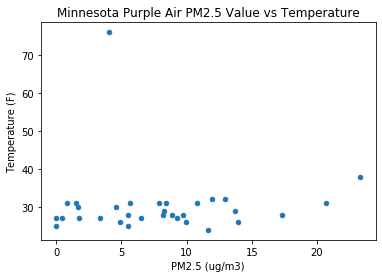

In [76]:
# Plotting data and checking for correlation
MN_purple_air_df.plot.scatter(x='PPM2_5', y='PTemp')
plt.xlabel("PM2.5 (ug/m3)")
plt.ylabel("Temperature (F)")
plt.title("Minnesota Purple Air PM2.5 Value vs Temperature")
plt.savefig("Images/PurpleAirMNPMvsTemp.png")
plt.show()

In [80]:
# EPA API
# sample data (lowest granularity date) by box (lat, long range)

lat_lng_range = 0.001

pollutant = '88101'
beginning_date = 20200126
end_date = beginning_date+1

# locations = purple_air_df[['PLat', 'PLng']]
# lat_range = pd.DataFrame()
# lat_range['Min Lat'] = locations.loc[:,'PLat'] - lat_lng_range
# lat_range['Max Lat'] = locations.loc[:,'PLat'] + lat_lng_range
# lng_range = pd.DataFrame()
# lng_range['Min Lng'] = locations.loc[:,'PLng'] - lat_lng_range
# lng_range['Max Lng'] = locations.loc[:,'PLng'] + lat_lng_range

# for minvalue, maxvalue in (zip(lat_range, lng_range)):
# #     for minlng, maxlng in lng_range:

#     base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
#     url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minvalue}&maxlat={maxvalue}&minlon={minvalue}&maxlon={maxvalue}'
#     response = requests.get(url).json()
#     print(response)
#     #     try:
    

# minlat = 37.2756-0.001
# maxlat = 37.2756+0.001
# minlng = -121.964-0.001
# maxlng = -121.964+0.001

minlat = 46.7296
maxlat = 46.7396
minlng = 94.6859
maxlng = 94.6959

epakey = 'amberhawk52'
epaemail = 'helloniharika@gmail.com'

base_url = "https://aps.eap.gov/data/api/sampleData/byBox?"
url = f'{base_url}email={epaemail}&key={epakey}&param={pollutant}&bdate={beginning_date}&edate={end_date}&minlat={minlat}&maxlat={maxlat}&minlon={minlng}&maxlon={maxlng}'
response = requests.get(url).json()
print(response)
        

# ex: https://aqs.epa.gov/data/api/sampleData/byBox?email=test@aqs.api&key=test&param=44201&bdate=20150501&edate=20150502&minlat=33.3&maxlat=33.6&minlon=-87.0&maxlon=-86.7
# https://aqs.epa.gov/data/api/sampleData/byBox?email=abby.lemon22@gmail.com&key=indigogoose44&param=88101&bdate=20200126&edate=20200127&minlat=37.2746&maxlat=37.2766&minlon=-121.963&maxlon=-121.965

ConnectionError: HTTPSConnectionPool(host='aps.eap.gov', port=443): Max retries exceeded with url: /data/api/sampleData/byBox?email=helloniharika@gmail.com&key=amberhawk52&param=88101&bdate=20200126&edate=20200127&minlat=46.7296&maxlat=46.7396&minlon=94.6859&maxlon=94.6959 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11e1ff470>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [ ]:
# EPA API
# EPA Air Quality Section
# yearly data by state (minnesota)

pm2_5_1Hour = []
pm2_5_24HourBulk = []
pm2_5_24Hour = []
year_list = []
years = [x for x in range(1990,2020)]

email = 'abby.lemon22@gmail.com'
state_code = "27" 
# PM2.5 - Local Conditions
pollutant = "88101"

for year in years:
    beginging_date = f"{year}0502"
    end_date = f"{year}0502"
    base_url = "https://aqs.epa.gov/data/api/annualData/byState?"
    url = f'{base_url}email={email}&key={epakey}&param={pollutant}&bdate={beginging_date}&edate={end_date}&state={state_code}'
    response = requests.get(url).json()
    try:
        pm2_5_1Hour.append(response['Data'][0]['arithmetic_mean'])
        pm2_5_24HourBulk.append(response['Data'][1]['arithmetic_mean'])
        pm2_5_24Hour.append(response['Data'][5]['arithmetic_mean'])
        year_list.append(response['Data'][0]['year'])
    except:
        print(f"No data found, skip {year}.")
        pass



In [ ]:
pm2_5_df = pd.DataFrame([year_list,pm2_5_1Hour,pm2_5_24HourBulk,pm2_5_24Hour]).T
pm2_5_df = pm2_5_df.rename(columns={0:'Year',
                                    1:'PM 2.5 1 hour',
                                    2:'PM 2.5 24 hour bulk',
                                    3:'PM 2.5 24 hour'
})
pm2_5_df['Year'] = pm2_5_df['Year'].astype(int)
# pm2_5_df['PM 2.5'] = pm2_5
pm2_5_df.to_csv("Resource/EPAData_per_year_MN.csv")
pm2_5_df

In [ ]:
pm_plot = pm2_5_df.plot(kind='line', x='Year',y=['PM 2.5 1 hour','PM 2.5 24 hour bulk','PM 2.5 24 hour'],grid=True)
plt.ylabel('PM2.5 (ug/m3)')
plt.title("Year vs Annual Mean PM2.5 Value")
plt.savefig("Images/YearvsAnnualMeanPM2_5Value.png")
plt.show()

In [ ]:
# Census API
# Thinking I might not need to pull Census data.

c = Census(censuskey, year=2018)
# need to get this working for 2019, what is the difference between 2010 and 2019?
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E", "B19301_001E", "B17001_002E"), {'for': 'zip code tabulation area:*'})

census_pd = pd.DataFrame(census_data)
census_pd

In [ ]:
# Abby's section ends here

In [ ]:
# Alan's section starts here

In [ ]:
# Alan's section ends here

In [ ]:
# Brandon's section starts here

In [ ]:
# Brandon's section ends here